# Run subset by (time) point operation

**Rooki** calls climate data operations on the **rook** processing service.


See issue: https://github.com/roocs/clisops/issues/230

In [1]:
import os
#os.environ['ROOK_URL'] = 'http://rook.dkrz.de/wps'
os.environ['ROOK_URL'] = 'http://compute.mips.copernicus-climate.eu/wps'
#os.environ['ROOK_URL'] = 'http://rook3.cloud.dkrz.de/wps'

from rooki import rooki

## use workflow

In [2]:
from rooki import operators as ops

In [3]:
wf = ops.Subset(
        ops.Input(
            'tas', ['c3s-cmip6.CMIP.NCAR.CESM2-WACCM-FV2.historical.r1i1p1f1.Amon.tas.gn.v20191120']
        ),
        time="1998/2000",
        #time_components="year:1998,1999,2000|month:jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec|day:01,02,03,04,05,06,07,08,09,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31"
        time_components="year:1998,1999,2000|month:jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec|day:14,15"
)

In [4]:
resp = wf.orchestrate()
resp.ok

True

In [5]:
ds = resp.datasets()[0]
ds

<xarray.Dataset>
Dimensions:    (time: 36, lat: 96, lon: 144, nbnd: 2)
Coordinates:
  * lat        (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 86.21 88.11 90.0
  * lon        (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time       (time) object 1998-01-15 12:00:00 ... 2000-12-15 12:00:00
Dimensions without coordinates: nbnd
Data variables:
    tas        (time, lat, lon) float32 ...
    time_bnds  (time, nbnd) object ...
    lat_bnds   (time, lat, nbnd) float64 ...
    lon_bnds   (time, lon, nbnd) float64 ...
Attributes: (12/45)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   674885.0
    branch_time_in_parent:  10950.0
    case_id:                1562
    ...                     ...
    sub_experiment_id:      none
    table_id:               Amon
    tracking_id:            hdl:21.14100/2ebbfd9d-97bf-4858-b893-80d31ffe8cc7
    variable_id:            tas
    variant_info:           CMIP6 CESM2 historical ensemble with WACCM6-FV2 (...
    variant_label:          r1i1p1f1

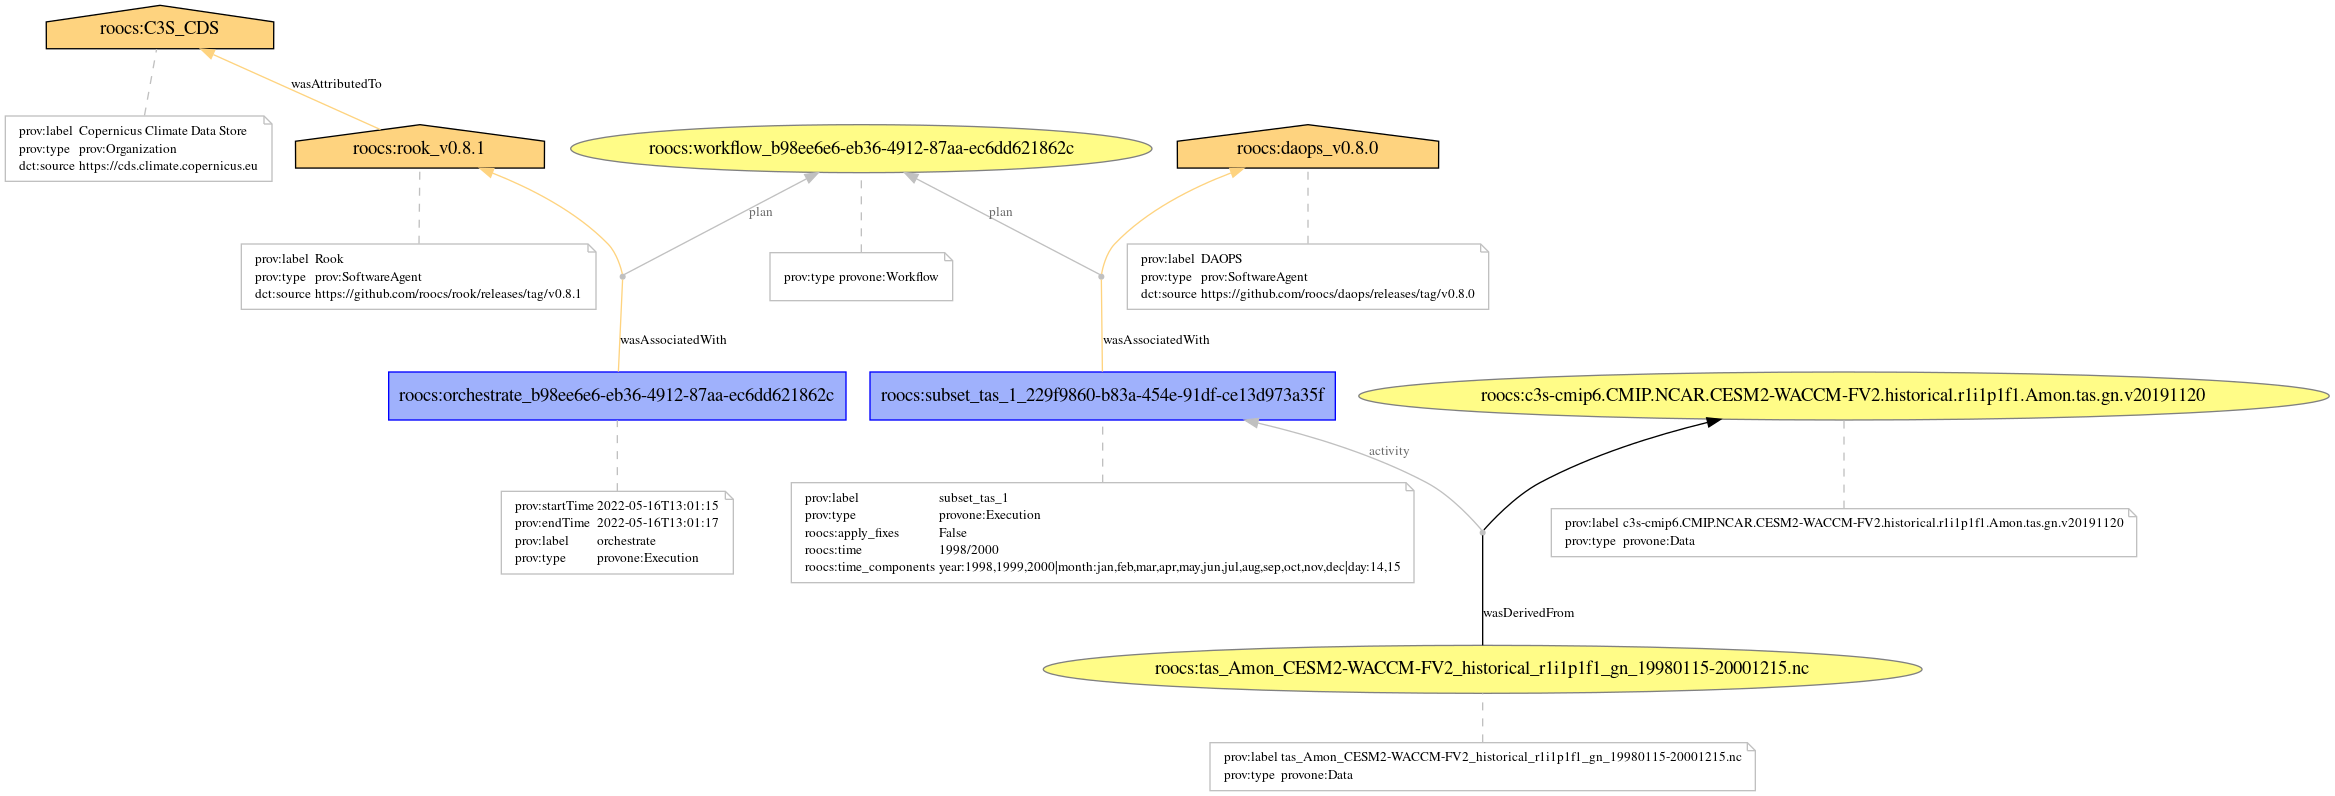

In [6]:
from IPython.display import Image
Image(resp.provenance_image())